In [1]:
using Distributed
addprocs(8)

8-element Array{Int64,1}:
 2
 3
 4
 5
 6
 7
 8
 9

In [2]:
#@everywhere using DelimitedFiles
#@everywhere using Revise, MDToolbox
using DelimitedFiles
using Revise, MDToolbox
ENV["COLUMNS"]=110; #display width for MDToolbox

┌ Info: Precompiling Revise [295af30f-e4ad-537b-8983-00126c2a3abe]
└ @ Base loading.jl:1278
┌ Warning: no Manifest.toml file found, static paths used
└ @ Revise /Users/yasu/.julia/packages/Revise/moD4B/src/packagedef.jl:1361
┌ Info: Precompiling MDToolbox [7965e2f0-a35b-11e8-0207-19c030dd2def]
└ @ Base loading.jl:1278


In [3]:
receptor=readpdb("1cgi_receptor.pdb")
ligand=readpdb("1cgi_ligand.pdb")

1x440 TrjArray{Float64,Int64}
| I                          | I                          |  …   I                          |
| 1ASP                       | 1ASP                       |  …   56CYS                      |
| 1801N                      | 1802CA                     |  …   2240OXT                    |
|    64.86    34.03    29.79 |    65.13    34.96    28.68 |  …      51.32    20.79    29.47 |

In [4]:
receptor =  MDToolbox.set_radius(receptor)
ligand = MDToolbox.set_radius(ligand)

1x440 TrjArray{Float64,Int64}
| I                          | I                          |  …   I                          |
| 1ASP                       | 1ASP                       |  …   56CYS                      |
| 1801N                      | 1802CA                     |  …   2240OXT                    |
|    64.86    34.03    29.79 |    65.13    34.96    28.68 |  …      51.32    20.79    29.47 |

In [5]:
receptor = MDToolbox.compute_sasa(receptor, 1.4)
ligand = MDToolbox.compute_sasa(ligand, 1.4)

1x440 TrjArray{Float64,Int64}
| I                          | I                          |  …   I                          |
| 1ASP                       | 1ASP                       |  …   56CYS                      |
| 1801N                      | 1802CA                     |  …   2240OXT                    |
|    64.86    34.03    29.79 |    65.13    34.96    28.68 |  …      51.32    20.79    29.47 |

In [6]:
receptor2 = TrjArray(receptor, charge=receptor.sasa)
writepdb("test.pdb", receptor2)

In [7]:
quaternions = readdlm("../data/quaternion/QUATERNION_LIST_576_Orient");
#quaternions = readdlm("../data/quaternion/QUATERNION_LIST_4608_Orient");
# quaternions = quaternions[1:10, :]
# quaternions = quaternions[1:50, :]
size(quaternions)

(576, 4)

In [8]:
grid_space = 1.2

1.2

In [9]:
@time result = MDToolbox.dock_fft(receptor, ligand, quaternions, grid_space=grid_space, tops=100)

Progress: 100%|█████████████████████████████████████████| Time: 0:28:58


1770.430329 seconds (1.17 G allocations: 21.378 GiB, 0.26% gc time)


(receptor = 1x1799 TrjArray{Float64,Int64}
| E                          | E                          |  …   E                          |
| 1CYS                       | 1CYS                       |  …   245ASN                     |
| 1N                         | 2CA                        |  …   1799OXT                    |
|   -12.18    -5.01   -10.91 |   -11.54    -4.57    -9.66 |  …      -0.11     7.22   -20.89 |, ligand = 100x440 TrjArray{Float64,Int64}
| I                          | I                          |  …   I                          |
| 1ASP                       | 1ASP                       |  …   56CYS                      |
| 1801N                      | 1802CA                     |  …   2240OXT                    |
|   -40.63    22.93     4.07 |   -41.06    24.33     4.25 |  …     -23.79    16.20     9.54 |
|    17.50    30.62    27.44 |    18.81    30.49    28.10 |          6.84    15.90    22.11 |
|   -41.83    22.93     4.07 |   -42.26    24.33     4.25 |        -2

In [17]:
result.score

100-element Array{Float64,1}:
 189.00000000000077
 178.999999999998
 175.00000000000074
 171.00000000000114
 165.99999999999935
 165.00000000000222
 164.99999999999852
 164.9999999999958
 164.00000000000497
 163.99999999999972
 163.99999999999812
 163.99999999999773
 163.99999999999739
   ⋮
 150.99999999999937
 150.99999999999775
 150.9999999999974
 150.99999999999605
 150.0000000000088
 150.00000000000344
 150.0000000000028
 150.00000000000148
 150.00000000000108
 149.99999999999946
 149.9999999999987
 149.99999999999704

In [18]:
result.ligand

100x440 TrjArray{Float64,Int64}
| I                          | I                          |  …   I                          |
| 1ASP                       | 1ASP                       |  …   56CYS                      |
| 1801N                      | 1802CA                     |  …   2240OXT                    |
|   -40.63    22.93     4.07 |   -41.06    24.33     4.25 |  …     -23.79    16.20     9.54 |
|    17.50    30.62    27.44 |    18.81    30.49    28.10 |          6.84    15.90    22.11 |
|   -41.83    22.93     4.07 |   -42.26    24.33     4.25 |        -24.99    16.20     9.54 |
|   -41.83    22.93     5.27 |   -42.26    24.33     5.45 |        -24.99    16.20    10.74 |
|   -37.09    14.51    24.54 |   -38.43    14.04    24.97 |        -31.08    14.31     6.58 |
|   -37.11    23.93   -23.34 |   -37.38    25.31   -23.77 |  …     -33.93    18.82    -5.38 |
|   -38.31    22.73   -24.54 |   -38.58    24.11   -24.97 |        -35.13    17.62    -6.58 |
|   -24.99   -23.95   -27.33

In [19]:
writepdb("result_receptor.pdb", result.receptor)
writepdb("result_ligand.pdb", result.ligand)

In [20]:
size(result.grid_RSC[60, :, :])

(229, 229)

In [21]:
using Plots

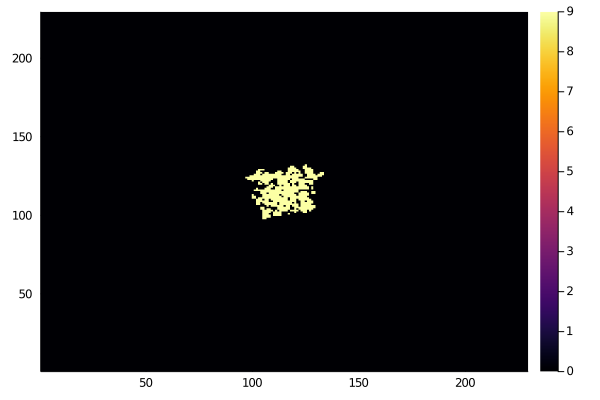

In [28]:
heatmap(imag(result.grid_RSC[110, :, :]))

In [16]:
abs.([1.0+6.0im, 7.0im])

2-element Array{Float64,1}:
 6.082762530298219
 7.0